In [61]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
from pandas.tseries.offsets import BMonthEnd
import datetime
import statsmodels.api as sm

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv('data/return_pf_excess_ret_beta.csv',index_col=0)
df['date'] = pd.to_datetime(df['date'],format='%Y%m') + BMonthEnd()
df = df.set_index(['date','permno'])
df

ret        mktcap    rf  excess_ret  \
date       permno                                             
1926-01-29 10006   0.032732  6.615000e+04   NaN         NaN   
           10022   0.017857  1.140000e+04   NaN         NaN   
           10030   0.161667  2.718300e+04   NaN         NaN   
           10049   0.141892  2.087500e+04   NaN         NaN   
           10057  -0.035714  5.906250e+03   NaN         NaN   
...                     ...           ...   ...         ...   
2022-03-31 93426   0.023559  4.054758e+05  0.01    0.013559   
           93427   0.049935  3.889284e+06  0.01    0.039935   
           93429  -0.024469  1.219740e+07  0.01   -0.034469   
           93434  -0.073913  8.287404e+04  0.01   -0.083913   
           93436   0.238009  1.113736e+09  0.01    0.228009   

                   benchmark_excess_ret    beta_5   beta_10   beta_20  \
date       permno                                                       
1926-01-29 10006               0.000000       NaN       NaN       NaN   
           10022               0.000000       NaN       NaN       NaN   
           10030               0.000000       NaN       NaN       NaN   
           10049               0.000000       NaN       NaN       NaN   
           10057               0.000000       NaN       NaN       NaN   
...                                 ...       ...       ...       ...   
2022-03-31 93426               0.031048  1.289819  1.196555  1.162551   
           93427               0.031048  1.119160  0.763804  0.859076   
           93429               0.031048  0.640248  0.905225  0.963663   
           93434               0.031048  2.209166  2.623052  1.460519   
           93436               0.031048  3.728205  2.899511  1.887399   

                    beta_30  
date       permno            
1926-01-29 10006        NaN  
           10022        NaN  
           10030        NaN  
           10049        NaN  
           10057        NaN  
...                     ...  
2022-03-31 93426   1.129329  
           93427   0.903141  
           93429   0.948496  
           93434   1.185026  
           93436   1.664232  

[4652777 rows x 9 columns]

In [22]:
spec_df = pd.read_pickle('data/specific_returns_halflifeNone_TOP2000.pkl')
spec_df = spec_df.stack()
spec_df.loc['1980-01-01':]


            permno
1980-01-31  10006     0.130611
            10057     0.198691
            10065     0.041284
            10137    -0.069640
            10145     0.053892
                        ...   
2022-03-31  93419     0.059511
            93423    -0.029646
            93427     0.039975
            93429    -0.045722
            93436     0.149377
Length: 1006577, dtype: float64

In [23]:
df['spec_ret'] = spec_df
for col_name in tqdm(['beta_5','beta_10','beta_20','beta_30']):
    tmp = df[col_name].unstack()
    tmp = tmp.shift(1)
    tmp = tmp.stack()
    df[col_name+"_lag"] = tmp
df

  0%|          | 0/4 [00:00<?, ?it/s]

ret        mktcap    rf  excess_ret  \
date       permno                                             
1926-01-29 10006   0.032732  6.615000e+04   NaN         NaN   
           10022   0.017857  1.140000e+04   NaN         NaN   
           10030   0.161667  2.718300e+04   NaN         NaN   
           10049   0.141892  2.087500e+04   NaN         NaN   
           10057  -0.035714  5.906250e+03   NaN         NaN   
...                     ...           ...   ...         ...   
2022-03-31 93426   0.023559  4.054758e+05  0.01    0.013559   
           93427   0.049935  3.889284e+06  0.01    0.039935   
           93429  -0.024469  1.219740e+07  0.01   -0.034469   
           93434  -0.073913  8.287404e+04  0.01   -0.083913   
           93436   0.238009  1.113736e+09  0.01    0.228009   

                   benchmark_excess_ret    beta_5   beta_10   beta_20  \
date       permno                                                       
1926-01-29 10006               0.000000       NaN       NaN       NaN   
           10022               0.000000       NaN       NaN       NaN   
           10030               0.000000       NaN       NaN       NaN   
           10049               0.000000       NaN       NaN       NaN   
           10057               0.000000       NaN       NaN       NaN   
...                                 ...       ...       ...       ...   
2022-03-31 93426               0.031048  1.289819  1.196555  1.162551   
           93427               0.031048  1.119160  0.763804  0.859076   
           93429               0.031048  0.640248  0.905225  0.963663   
           93434               0.031048  2.209166  2.623052  1.460519   
           93436               0.031048  3.728205  2.899511  1.887399   

                    beta_30  spec_ret  beta_5_lag  beta_10_lag  beta_20_lag  \
date       permno                                                             
1926-01-29 10006        NaN       NaN         NaN          NaN          NaN   
           10022        NaN       NaN         NaN          NaN          NaN   
           10030        NaN       NaN         NaN          NaN          NaN   
           10049        NaN       NaN         NaN          NaN          NaN   
           10057        NaN       NaN         NaN          NaN          NaN   
...                     ...       ...         ...          ...          ...   
2022-03-31 93426   1.129329       NaN    1.370164     1.210224     1.167452   
           93427   0.903141  0.039975    0.902674     0.712518     0.850153   
           93429   0.948496 -0.045722    1.047012     1.048456     1.001944   
           93434   1.185026       NaN    3.397913     2.959594     1.536929   
           93436   1.664232  0.149377    2.646297     2.556310     1.800245   

                   beta_30_lag  
date       permno               
1926-01-29 10006           NaN  
           10022           NaN  
           10030           NaN  
           10049           NaN  
           10057           NaN  
...                        ...  
2022-03-31 93426      1.133371  
           93427      0.898269  
           93429      0.972102  
           93434      1.232479  
           93436      1.613183  

[4652777 rows x 14 columns]

In [24]:
initial_date = datetime.date(1970,1,1) + BMonthEnd()
validation_final_date = datetime.date(1999,12,1) + BMonthEnd()

df_train = df[(df.index.get_level_values('date') <= validation_final_date)&(df.index.get_level_values('date') >= initial_date)]
df_test = df[(df.index.get_level_values('date') > validation_final_date)]

In [59]:
def shrink_beta(beta,weight=0.5,target=1):
    return weight*beta + weight*target

def sigmoid_beta(beta):
    return 1/(1+np.exp(np.minimum(np.maximum(-(beta-1),-10),10)))

def z_score(beta,clip=None):
    z = (beta - np.mean(beta))/np.std(beta)
    if clip:
        z = np.maximum(z,clip[0])
        z = np.minimum(z,clip[1])
    return z

In [82]:
reg_results = dict(zip(['beta_5_lag','beta_10_lag','beta_20_lag','beta_30_lag'],[[] for i in range(4)]))

for i,date in tqdm(enumerate(df_train.index.get_level_values('date').unique())):
    if i<=60:
        continue
    X = df_train.loc[date,['beta_5_lag','beta_10_lag','beta_20_lag','beta_30_lag']].dropna()
    y = df_train.loc[date,'spec_ret'].dropna()
    # X,y = X.align(y,join='inner',axis=0)
    for col in ['beta_5_lag','beta_10_lag','beta_20_lag','beta_30_lag']:
        cur_X = X[[col]]
        # cur_X = cur_X.clip(-3,4)
        cur_X= shrink_beta(cur_X)
        # cur_X = sigmoid_beta(cur_X)
        cur_X= z_score(cur_X,clip=None)#(-3,3))
        # cur_X = cur_X.rank(axis=0,numeric_only=True,pct=True,ascending=True)

        cur_X,cur_y = cur_X.align(y,join='inner',axis=0)
        # cur_y=y


        res = sm.OLS(cur_y,sm.add_constant(cur_X)).fit()
        # res = sm.RLM(y,sm.add_constant(cur_X), M=sm.robust.norms.HuberT()).fit(scale_est=sm.robust.scale.HuberScale())
        # display(res.summary())
        res_ser = pd.Series({
            "const": res.params.const,
            "coef": res.params[col],
            "t_stat": res.tvalues[col],
            "r2": res.rsquared
        },name=date)
        reg_results[col].append(res_ser)

0it [00:00, ?it/s]

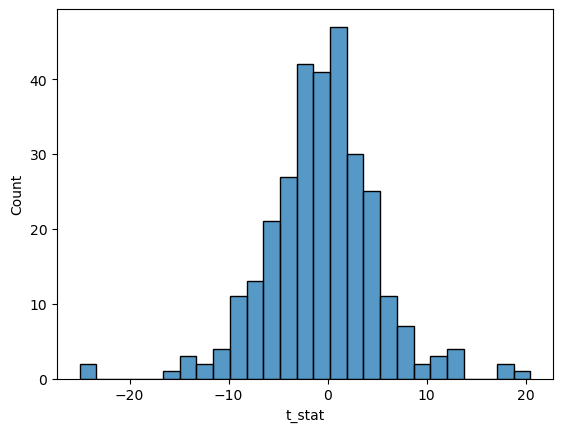

-0.6559746818128661


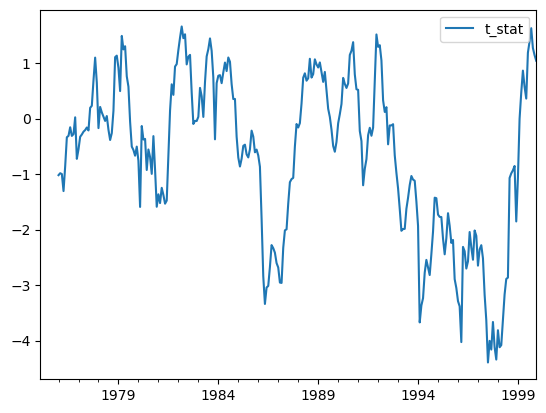

In [85]:
tmp = pd.DataFrame(reg_results['beta_30_lag'])['t_stat'].loc['1975-01-01':]
sns.histplot(tmp)
plt.show()
tmp.ewm(12,min_periods=12).mean().plot(legend=True)
print(tmp.mean())

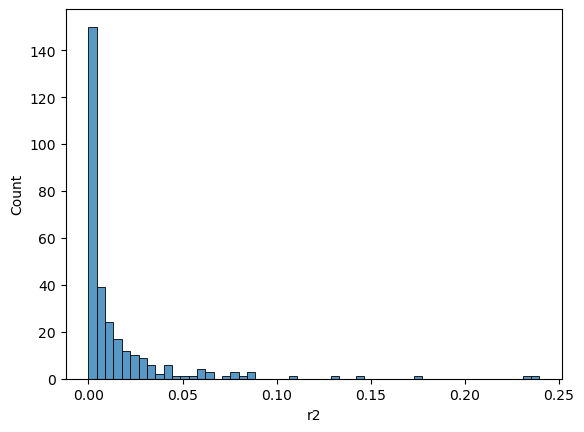

0.015047061731095528


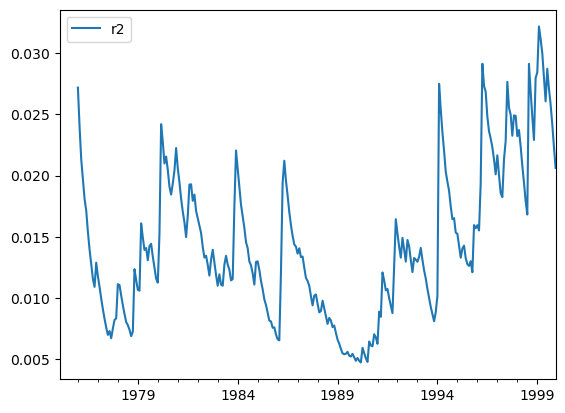

In [89]:
tmp = pd.DataFrame(reg_results['beta_30_lag'])['r2'].loc['1975-01-01':]
sns.histplot(tmp)
plt.show()
tmp.ewm(12,min_periods=12).mean().plot(legend=True)
print(tmp.mean())